In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import datetime
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import torch
from torch import nn

def forma(x):
    # x = [float(i.replace(',','.')) for i in  x.values]
    x = [float(i) for i in  x.values]
    return x

def scale(x):
    x_mean = np.mean(x)
    x_std  = np.std(x)
    x_scaled = (x - x_mean)/x_std
    return x_scaled

def norm_scale(x):
    min = np.min(x)
    max = np.max(x)
    x_scaled = (x - min) / (max - min)
    return x_scaled

def shifting(df, values_for_shift):
    new_df1 = df.iloc[:, 0:9]
    new_columns = {}
    for key, value in values_for_shift.items():
        new_columns[key] = df[key]
        for i in range(1, value+1):
            new_columns[f'{key} -{i}'] = df[key].shift(periods=i, fill_value=np.nan)
    new_df2 = pd.DataFrame(new_columns)
    new_df = pd.concat([new_df1, new_df2], axis=1)
    return new_df

In [7]:
df = pd.read_csv(r"Compare_ACE_DSCOVR.csv", sep=';', na_values='N', decimal=',')

values = ['Dst', 'B_x', 'B_gsm_y', 'B_gsm_z', 'B_magn', 'H_den_SWP', 'SW_spd']
# values = ['B_x', 'SW_spd', 'B_magn']
nums_of_shifts = [10, 21, 11, 3, 14, 10, 55]
# nums_of_shifts = [2, 6, 5]


values_for_shift = dict(zip(values, nums_of_shifts))

df = shifting(df, values_for_shift)

# for name in list(df.iloc[:, 9::].columns):
#     data = norm_scale(df[name])
#     df[name] = data

# df = df.dropna()

print('Как осуществлено погружение:')
check_df = df.iloc[:6, 7:25]
check_df

Как осуществлено погружение:


,doyCos,hourCos,Dst,Dst -1,Dst -2,Dst -3,Dst -4,Dst -5,Dst -6,Dst -7,Dst -8,Dst -9,Dst -10,B_x,B_x -1,B_x -2,B_x -3,B_x -4
0,-0.862961,-0.130526,-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5109,NaN,NaN,NaN,NaN
1,-0.862598,-0.382683,-15,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2293,0.5109,NaN,NaN,NaN
2,-0.862235,-0.608761,-15,-15.0,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0036,1.2293,0.5109,NaN,NaN
3,-0.861872,-0.793353,-13,-15.0,-15.0,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7186,1.0036,1.2293,0.5109,NaN
4,-0.861508,-0.923880,-13,-13.0,-15.0,-15.0,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.0828,1.7186,1.0036,1.2293,0.5109
5,-0.861143,-0.991445,-14,-13.0,-13.0,-15.0,-15.0,-14.0,NaN,NaN,NaN,NaN,NaN,-0.4203,-0.0828,1.7186,1.0036,1.2293


In [11]:
new_values = list(df.iloc[:, 9:].columns)

date_values = ['year', 'month', 'day', 'hour from']
date = pd.DataFrame(df.loc[:, date_values])

date['hour from'] = date['hour from'].map(lambda x: '0'+str(x) if x not in range(10, 24) else str(x))
date['datetime'] = date['year'].astype(str) + date['month'].astype(str) + date['day'].astype(str) + ' ' + date['hour from']
date['datetime'] = pd.to_datetime(date['datetime'])

dataset = df[new_values]
dataset = dataset.set_index(date['datetime'])

dataset

,Dst,Dst -1,Dst -2,Dst -3,Dst -4,Dst -5,Dst -6,Dst -7,Dst -8,Dst -9,...,SW_spd -46,SW_spd -47,SW_spd -48,SW_spd -49,SW_spd -50,SW_spd -51,SW_spd -52,SW_spd -53,SW_spd -54,SW_spd -55
datetime,,,,,,,,,,,,,,,,,,,,,
1997-10-21 00:00:00,-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-10-21 01:00:00,-15,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-10-21 02:00:00,-15,-15.0,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-10-21 03:00:00,-13,-15.0,-15.0,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-10-21 04:00:00,-13,-13.0,-15.0,-15.0,-14.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 07:00:00,-20,-20.0,-14.0,-15.0,-17.0,-25.0,-21.0,-25.0,-21.0,-11.0,...,494.1724,499.9834,516.6030,510.9792,515.7847,515.6754,509.1985,518.5083,526.9510,530.7992
2021-03-25 08:00:00,-18,-20.0,-20.0,-14.0,-15.0,-17.0,-25.0,-21.0,-25.0,-21.0,...,507.8516,494.1724,499.9834,516.6030,510.9792,515.7847,515.6754,509.1985,518.5083,526.9510
2021-03-25 09:00:00,-11,-18.0,-20.0,-20.0,-14.0,-15.0,-17.0,-25.0,-21.0,-25.0,...,494.2719,507.8516,494.1724,499.9834,516.6030,510.9792,515.7847,515.6754,509.1985,518.5083


In [17]:
# df_to_scale = df.iloc[:, 9:]
# df_not_to_scale = df.iloc[:, :9]
# names = list(df.iloc[:, 9:].columns)

# scaler = MinMaxScaler()

# df_to_scale = scaler.fit_transform(df_to_scale)
# df_scaled = pd.DataFrame(df_to_scale, columns=names)

# # df_not_to_scale
# # df_scaled

# # print("Нормировка при помощи MinMaxScaler")
# df_new = pd.concat([df_not_to_scale, df_scaled], ignore_index=True, sort=False)
# # df_new = df_new.dropna()
# df = df_new
# df

scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset_scaled = pd.DataFrame(dataset, columns=names)

dataset_scaled
dataset = dataset_scaled.dropna()

dataset

,Dst,Dst -1,Dst -2,Dst -3,Dst -4,Dst -5,Dst -6,Dst -7,Dst -8,Dst -9,...,SW_spd -46,SW_spd -47,SW_spd -48,SW_spd -49,SW_spd -50,SW_spd -51,SW_spd -52,SW_spd -53,SW_spd -54,SW_spd -55
0,0.831663,0.831663,0.829659,0.833667,0.833667,0.825651,0.825651,0.831663,0.835671,0.829659,...,0.644512,0.636439,0.632847,0.625353,0.613136,0.606003,0.607595,0.602845,0.599789,0.600676
1,0.841683,0.831663,0.831663,0.829659,0.833667,0.833667,0.825651,0.825651,0.831663,0.835671,...,0.644089,0.635352,0.633250,0.624603,0.612982,0.606293,0.606003,0.601555,0.601980,0.599789
2,0.847695,0.841683,0.831663,0.831663,0.829659,0.833667,0.833667,0.825651,0.825651,0.831663,...,0.643797,0.634935,0.632168,0.625000,0.612247,0.606141,0.606293,0.599979,0.600692,0.601980
3,0.833667,0.847695,0.841683,0.831663,0.831663,0.829659,0.833667,0.833667,0.825651,0.825651,...,0.640926,0.634647,0.631753,0.623932,0.612637,0.605414,0.606141,0.600265,0.599118,0.600692
4,0.841683,0.833667,0.847695,0.841683,0.831663,0.831663,0.829659,0.833667,0.833667,0.825651,...,0.639348,0.631818,0.631467,0.623523,0.611590,0.605799,0.605414,0.600115,0.599404,0.599118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202789,0.859719,0.849699,0.849699,0.841683,0.841683,0.833667,0.821643,0.815631,0.811623,0.813627,...,0.762445,0.752885,0.748726,0.740553,0.729828,0.722749,0.725276,0.724499,0.730539,0.727917
202790,0.857715,0.859719,0.849699,0.849699,0.841683,0.841683,0.833667,0.821643,0.815631,0.811623,...,0.758736,0.751609,0.749111,0.738972,0.725904,0.721683,0.722749,0.718065,0.723459,0.730539
202791,0.831663,0.857715,0.859719,0.849699,0.849699,0.841683,0.841683,0.833667,0.821643,0.815631,...,0.755974,0.747952,0.747842,0.739353,0.724354,0.717802,0.721683,0.715564,0.717035,0.723459
202792,0.823647,0.831663,0.857715,0.859719,0.849699,0.849699,0.841683,0.841683,0.833667,0.821643,...,0.754277,0.745230,0.744204,0.738099,0.724727,0.716270,0.717802,0.714508,0.714537,0.717035


In [11]:
# data_discover = pd.read_csv(r'Discover Часовые общий.csv', sep=';', na_values='N', decimal=',')

# names = ['bx_gsm', 'by_gsm', 'bz_gsm', 'bt', 'proton_density', 'proton_speed', 'proton_temperature']

# for elem in names:
#     data_discover = data_discover.dropna()

In [18]:
if not dataset.index.is_monotonic_increasing:
   dataset = dataset.sort_index()

x_train = dataset.loc[:'2019-01-01 01:00:00', dataset.columns[1:]]
x_test = dataset.loc['2019-01-01 01:00:00':, dataset.columns[1:]]
y_train = dataset['Dst'].loc[:'2019-01-01 01:00:00']
y_test = dataset['Dst'].loc['2019-01-01 01:00:00':]

pipe = make_pipeline(MinMaxScaler(), LinearRegression())
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

R_2 = metrics.r2_score(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
MAE = metrics.mean_absolute_error(y_test, y_pred)

print('R**2 score:', R_2)
print('MSE:', MSE)
print('MAE:', MAE)

# y_pred = pd.DataFrame(y_pred)
# y_pred.frame(rx)
# print('y_predicted:', y_pred)

R**2 score: 0.9088109080503202
MSE: 6.442544402867431e-05
MAE: 0.005023889604598415


In [21]:
if not dataset.index.is_monotonic_increasing:
   dataset = dataset.sort_index()

x_train = dataset.loc[:'2019-01-01 01:00:00', dataset.columns[1:]].to_numpy()
x_test = dataset.loc['2019-01-01 02:00:00':, dataset.columns[1:]].to_numpy()
y_train = dataset['Dst'].loc[:'2019-01-01 01:00:00'].to_numpy()
y_test = dataset['Dst'].loc['2019-01-01 02:00:00':].to_numpy()

# x_train= x_train.reshape(-1, 1)
# x_test = x_test.reshape(-1, 1)

model = linear_model.LinearRegression()
model.fit(x_train, y_train)
# print('Coefficients:', model.coef_)
# print('Intercept:', model.intercept_)
# print()

y_pred = model.predict(x_test)

R_2 = metrics.r2_score(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
MAE = metrics.mean_absolute_error(y_test, y_pred)

print('R**2 score:', R_2)
print('MSE:', MSE)
print('MAE:', MAE)

R**2 score: 0.9088109080503195
MSE: 6.442544402867476e-05
MAE: 0.005023889604598439


In [16]:
# plt.hist(MSE, color = 'blue', edgecolor = 'black',
#          bins = 5)

# plt.xlabel('ACE')
# plt.ylabel('MSE, нТл')

In [42]:
# corr_matrix = dataset.corr()

# plt.figure(figsize=(6,5))
# sns.heatmap(corr_matrix)
# plt.show()

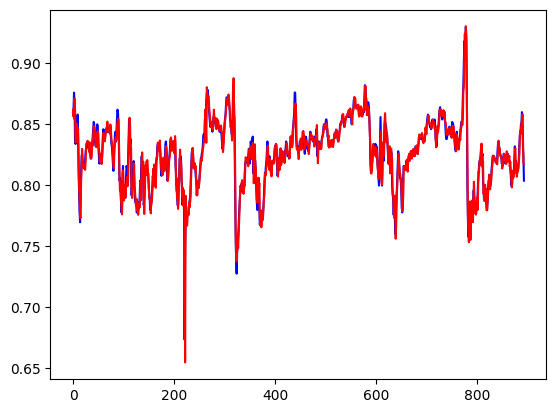

In [22]:
plt.plot(y_test, c='blue')
plt.plot(y_pred, c='red')
plt.show()
# вообще какой-то бред

In [18]:
len(y_pred), len(y_test), len(dataset['Dst']), len(y_train), len(y_train)+len(y_test)

(19535, 19535, 202794, 183260, 202795)